<a href="https://colab.research.google.com/github/Guryansh/Clustering-Assignment/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [2]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [3]:
facebookDataSet = get_data("facebook")[:1000]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [4]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(facebookDataSet, verbose=False)

In [5]:
result = [[[] for _ in range(3)] for _ in range(6)]
for i in range(3,6):
  KMeanClusteringModel = create_model('kmeans', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[0][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9415,3725.8158,0.5527,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6654,3902.6996,0.5334,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6428,3483.1755,0.5673,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.9415, 3725.8158, 0.5527), (0.6654, 3902.6996, 0.5334), (0.6428, 3483.1755, 0.5673)], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]


In [6]:
#NORMALIZATION
kMeanClusteringParameters = setup(facebookDataSet,  normalize = True, normalize_method = 'zscore', verbose=False)
for i in range(3,6):
  KMeanClusteringModel = create_model('kmeans', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[1][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.5594,9.8696,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0013,1.7445,13.8066,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0015,1.6838,13.1456,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.9415, 3725.8158, 0.5527), (0.6654, 3902.6996, 0.5334), (0.6428, 3483.1755, 0.5673)], [(0.0009, 1.5594, 9.8696), (0.0013, 1.7445, 13.8066), (0.0015, 1.6838, 13.1456)], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]


In [7]:
#TRANSFORMATION
kMeanClusteringParameters = setup(facebookDataSet,  transformation = True, transformation_method = 'yeo-johnson', verbose=False)
for i in range(3,6):
  KMeanClusteringModel = create_model('kmeans', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[2][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3361,889.1716,0.9860,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3551,773.1399,0.9910,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3325,771.2416,0.9443,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.9415, 3725.8158, 0.5527), (0.6654, 3902.6996, 0.5334), (0.6428, 3483.1755, 0.5673)], [(0.0009, 1.5594, 9.8696), (0.0013, 1.7445, 13.8066), (0.0015, 1.6838, 13.1456)], [(0.3361, 889.1716, 0.986), (0.3551, 773.1399, 0.991), (0.3325, 771.2416, 0.9443)], [[], [], []], [[], [], []], [[], [], []]]


In [17]:
#PCA
kMeanClusteringParameters = setup(facebookDataSet,  pca = True, pca_method = 'linear', verbose=False)
for i in range(3,6):
  KMeanClusteringModel = create_model('kmeans', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[3][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9468,3833.2647,0.1269,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9472,3825.3270,0.1129,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6169,4937.2260,0.4342,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.9415, 3725.8158, 0.5527), (0.6654, 3902.6996, 0.5334), (0.6428, 3483.1755, 0.5673)], [(0.0009, 1.5594, 9.8696), (0.0013, 1.7445, 13.8066), (0.0015, 1.6838, 13.1456)], [(0.0012, 1.0098, 0.9941), (0.001, 1.014, 0.9925), (-0.0004, 1.0106, 0.9946)], [(0.9468, 3833.2647, 0.1269), (0.9472, 3825.327, 0.1129), (0.6169, 4937.226, 0.4342)], [[], [], []], [[], [], []]]


In [18]:
#T+N
kMeanClusteringParameters = setup(facebookDataSet,  transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
for i in range(3,6):
  KMeanClusteringModel = create_model('kmeans', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[4][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0017,1.9260,15.8093,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0007,1.7940,17.8498,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0008,1.7413,16.3699,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.9415, 3725.8158, 0.5527), (0.6654, 3902.6996, 0.5334), (0.6428, 3483.1755, 0.5673)], [(0.0009, 1.5594, 9.8696), (0.0013, 1.7445, 13.8066), (0.0015, 1.6838, 13.1456)], [(0.0012, 1.0098, 0.9941), (0.001, 1.014, 0.9925), (-0.0004, 1.0106, 0.9946)], [(0.9468, 3833.2647, 0.1269), (0.9472, 3825.327, 0.1129), (0.6169, 4937.226, 0.4342)], [(0.0017, 1.926, 15.8093), (0.0007, 1.794, 17.8498), (0.0008, 1.7413, 16.3699)], [[], [], []]]


In [19]:
#T+N+PCA
kMeanClusteringParameters = setup(facebookDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', verbose=False)
for i in range(3,6):
  KMeanClusteringModel = create_model('kmeans', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[5][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0006,1.0059,0.9964,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0004,1.0074,0.9957,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0000,1.0061,0.9961,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.9415, 3725.8158, 0.5527), (0.6654, 3902.6996, 0.5334), (0.6428, 3483.1755, 0.5673)], [(0.0009, 1.5594, 9.8696), (0.0013, 1.7445, 13.8066), (0.0015, 1.6838, 13.1456)], [(0.0012, 1.0098, 0.9941), (0.001, 1.014, 0.9925), (-0.0004, 1.0106, 0.9946)], [(0.9468, 3833.2647, 0.1269), (0.9472, 3825.327, 0.1129), (0.6169, 4937.226, 0.4342)], [(0.0017, 1.926, 15.8093), (0.0007, 1.794, 17.8498), (0.0008, 1.7413, 16.3699)], [(0.0006, 1.0059, 0.9964), (0.0004, 1.0074, 0.9957), (0.0, 1.0061, 0.9961)]]


                  No Processing                       Normalization            \
                      Cluster 3  Cluster 4  Cluster 5     Cluster 3 Cluster 4   
Silhouette               0.9415     0.6654     0.6428        0.0009    0.0013   
Calinski-Harabasz     3725.8158  3902.6996  3483.1755        1.5594    1.7445   
Davies-Bouldin           0.5527     0.5334     0.5673        9.8696   13.8066   

                            Transformation                            PCA  \
                  Cluster 5      Cluster 3 Cluster 4 Cluster 5  Cluster 3   
Silhouette           0.0015         0.0012    0.0010   -0.0004     0.9468   
Calinski-Harabasz    1.6838         1.0098    1.0140    1.0106  3833.2647   
Davies-Bouldin      13.1456         0.9941    0.9925    0.9946     0.1269   

                                              T+N                      \
                   Cluster 4  Cluster 5 Cluster 3 Cluster 4 Cluster 5   
Silhouette            0.9472     0.6169    0.0017    0.0007   

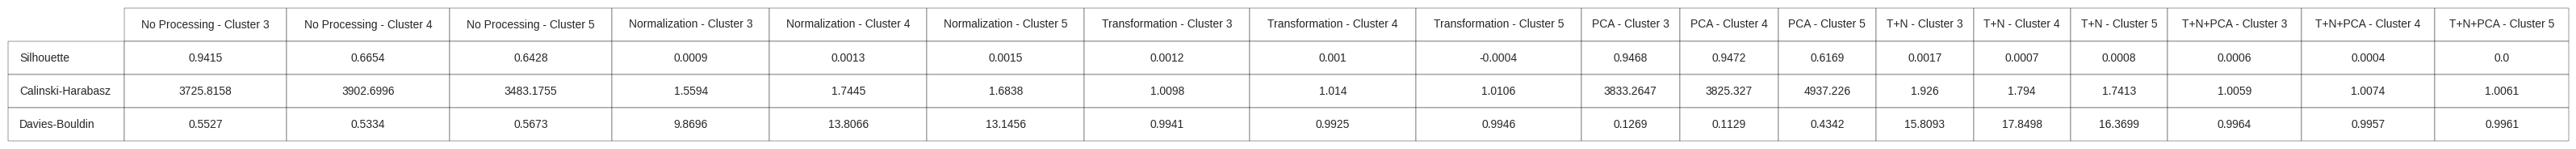

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

rows = ['Cluster 3', 'Cluster 4', 'Cluster 5']

headers = ['', 'No Processing', 'Normalization', 'Transformation', 'PCA', 'T+N', 'T+N+PCA']

dfs = []

df_nothing = pd.DataFrame(result[0], index=rows, columns=columns)
dfs.append(df_nothing.T)

df_normalization = pd.DataFrame(result[1], index=rows, columns=columns)
dfs.append(df_normalization.T)

df_transformation = pd.DataFrame(result[2], index=rows, columns=columns)
dfs.append(df_transformation.T)

df_pca = pd.DataFrame(result[3], index=rows, columns=columns)
dfs.append(df_pca.T)

df_tn = pd.DataFrame(result[4], index=rows, columns=columns)
dfs.append(df_tn.T)

df_tnpca = pd.DataFrame(result[5], index=rows, columns=columns)
dfs.append(df_tnpca.T)

combined_df = pd.concat(dfs, axis=1, keys=headers[1:])
print(combined_df)
# Create a large enough figure to display the content clearly
fig, ax = plt.subplots(figsize=(32, 2))  # Increase figure size for better fit
ax.axis('off')  # Turn off the axes

# Create the table with multi-level headers (handling both row and column labels)
table = ax.table(cellText=combined_df.values,
                rowLabels=combined_df.index,
                colLabels=[f'{col[0]} - {col[1]}' for col in combined_df.columns],
                loc='center',
                cellLoc='center',
                bbox=[0, 0, 1, 1])

# Adjust font size and column width
table.auto_set_font_size(False)
table.set_fontsize(10)  # Set a readable font size for the text

# Adjust column width to fit text properly
for i, col in enumerate(combined_df.columns):
    column_width = max(len(str(item)) for item in combined_df[col]) + 2  # Extra padding for clarity
    table.auto_set_column_width([i])  # Auto set the column width

# Manually adjust figure size and DPI for higher resolution if necessary
fig.tight_layout()  # Make sure everything fits within the figure bounds

# Save the figure as an image file (e.g., PNG)
plt.savefig('combined_df_table_v3.png', bbox_inches='tight', dpi=300)

# Optionally show the plot to verify visually before saving
plt.show()